## Five Visualizations, Exam Exercise

In [1]:
# Importing data manipulation and visualization modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Read our final project data - trips_full - from local *.csv file
trips_full_df = pd.read_csv("trips_full.csv")


In [3]:
# Check column types
# trips_full_df.dtypes


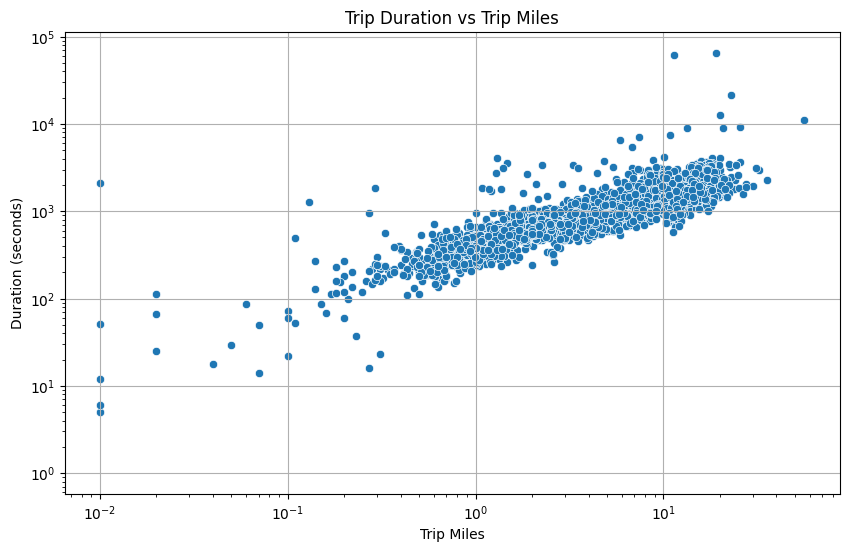

In [4]:
# Plot taxi trip duration vs trip miles
plt.figure(figsize=(10, 6))
sns.scatterplot(x="trip_miles", y="trip_seconds", data=trips_full_df)
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.title("Trip Duration vs Trip Miles")
plt.xlabel("Trip Miles")
plt.ylabel("Duration (seconds)")
plt.show()


In [5]:
company_counts = trips_full_df["company"].value_counts().reset_index()


In [6]:
company_counts


,company,count
0,Flash Cab,590
1,Taxi Affiliation Services,329
2,Sun Taxi,251
3,City Service,220
4,Taxicab Insurance Agency Llc,209
5,5 Star Taxi,138
6,Chicago Independents,118
7,Blue Ribbon Taxi Association,102
8,Tac - Yellow Cab Association,73
9,Globe Taxi,70


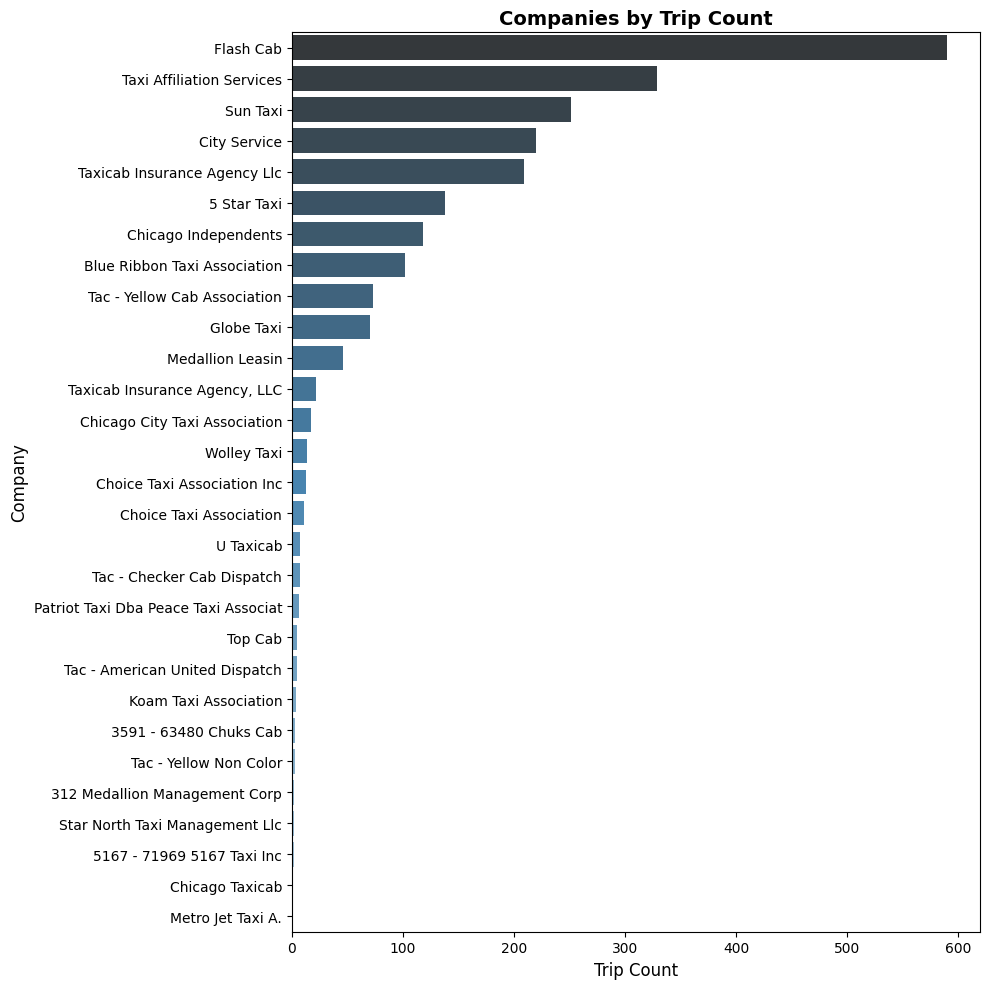

In [7]:
# Plot trip count by companies
# Count trips per company using .value_counts() and converts the result
# to a DataFrame with reset_index()
company_counts = trips_full_df["company"].value_counts().reset_index()
# Rename columns for clarity to 'company' and 'trip_count'
company_counts.columns = ["company", "trip_count"]
# Generate a blue gradient palette ("Blues_d" = dark variants) and reverses it
# ([::-1]) so darker blues = higher trip counts
reversed_blues = sns.color_palette("Blues_d", n_colors=len(company_counts))[::-1]
# Plot companies vs trip count barplot
plt.figure(figsize=(10, 10))
sns.barplot(
    x="trip_count",
    y="company",
    data=company_counts,
    palette=reversed_blues,
    hue="company",
    dodge=False,
    legend=False,
)
plt.title("Companies by Trip Count", fontsize=14, fontweight="bold")
plt.xlabel("Trip Count", fontsize=12)
plt.ylabel("Company", fontsize=12)
# Fix label cutoffs
plt.tight_layout()
plt.show()


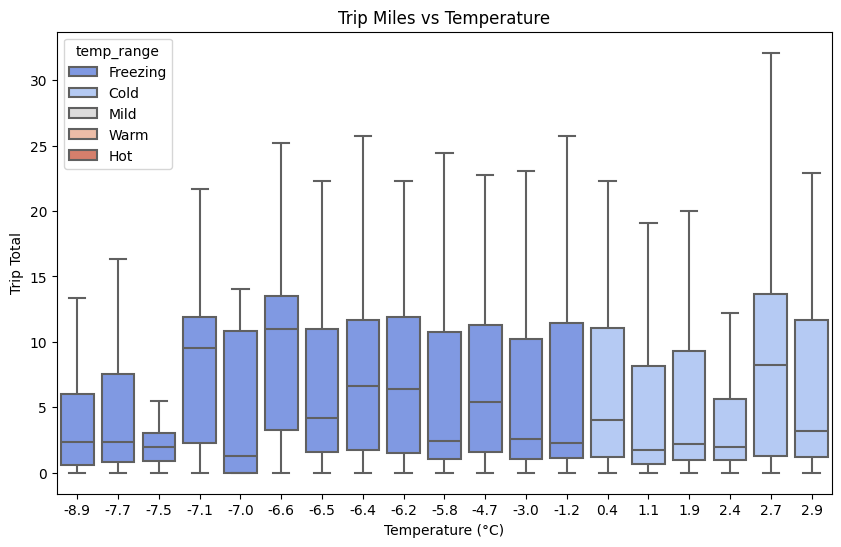

In [8]:
# Trip miles vs temperature
plt.figure(figsize=(10, 6))
# Create a copy whihel keeping the original intact
df = trips_full_df
# Define custom temperature bins and labels
temp_bins = [-float("inf"), 0, 8, 16, 26, float("inf")]
temp_labels = ["Freezing", "Cold", "Mild", "Warm", "Hot"]
# Create the temperature range column
df["temp_range"] = pd.cut(
    df["tempretaure_y"], bins=temp_bins, labels=temp_labels, right=False
)
# Plot trip miles vs temperature boxplot
sns.boxplot(
    data=df,
    x="tempretaure_y",
    y="trip_miles",
    showfliers=False,
    palette="coolwarm",
    hue="temp_range",
    linewidth=1.5,
)
plt.title("Trip Miles vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Trip Total")
plt.show()


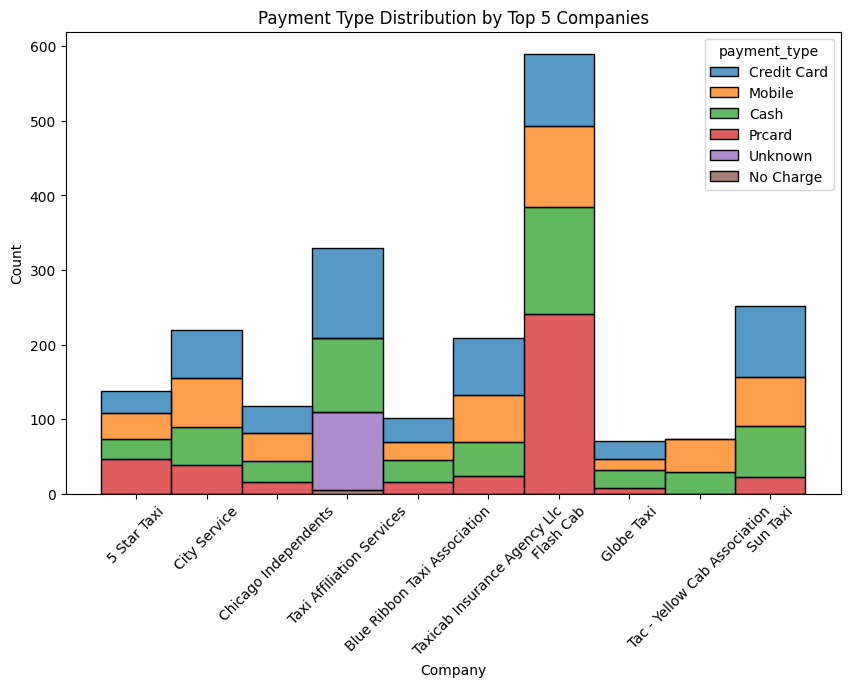

In [9]:
# Payment type by Top10 companies
plt.figure(figsize=(10, 6))
top10_companies = trips_full_df["company"].value_counts().nlargest(10).index
filtered = trips_full_df[trips_full_df["company"].isin(top10_companies)]
sns.histplot(data=filtered, x="company", hue="payment_type", multiple="stack")
plt.title("Payment Type Distribution by Top 5 Companies")
plt.xlabel("Company")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [10]:
# Top5 companies by average fare per minute
# Create a copy whihel keeping the original intact
df = trips_full_df
# Remove metrics NaNs and zero divisors
df = df.dropna(subset=["trip_seconds", "fare"])
df = df[df["trip_seconds"] > 0]
# Calculate fare per minute
df["fare_per_min"] = df["fare"] / (df["trip_seconds"] / 60)
# Get top companies by highest average fare per minute
top_companies = (
    df.groupby("company")["fare_per_min"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
# Create a bar chart
fig = px.bar(
    top_companies.head(5),
    x="company",
    y="fare_per_min",
    title="Top 5 Companies by Average Fare per Minute",
    labels={"fare_per_min": "Fare ($/min)", "company": "Company"},
    color="company",
    text_auto=".2f",
)
# Created chart settings
fig.update_layout(
    xaxis_title="Company",
    yaxis_title="Fare per Minute ($)",
    showlegend=False,
)
fig.update_xaxes(tickangle=-45)
# Plot chart
fig.show()
